# ECBM 4040 Fall '21 Project  - BIOM Group

## Initialization

In [13]:
import numpy as np
import tensorflow as tf
import pickle
from matplotlib import pyplot as plt

import shutil
import os

from model.models_cstm import get_embedding_model
from model.train_model import train_siamese_model

!pip3 install keras-tuner
import keras_tuner


You should consider upgrading via the '/home/ecbm4040/envTF24/bin/python3 -m pip install --upgrade pip' command.


In [14]:
DISTANCE_METRICS = {
    'EUCLIDEAN': 'euclidean',
    'HYPERBOLIC': 'hyperbolic',
    'MANHATTAN': 'manhattan',
    'SQUARE': 'square',
    'COSINE': 'cosine'
}

In [15]:
# set random number seeds for reproducible results
np.random.seed(1)
tf.random.set_seed(1)

## Get Qiita Data

In [16]:
!wget https://www.dropbox.com/s/mv546rx259tgwaz/qiita_numpy.pkl

--2021-12-19 19:22:01--  https://www.dropbox.com/s/mv546rx259tgwaz/qiita_numpy.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/mv546rx259tgwaz/qiita_numpy.pkl [following]
--2021-12-19 19:22:02--  https://www.dropbox.com/s/raw/mv546rx259tgwaz/qiita_numpy.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc187dbefefb10e8b172df8fe95d.dl.dropboxusercontent.com/cd/0/inline/BcIFI3kVKbHdrVCcp1AdnC2Ww22RT7KOmAm7Wz9IgBq_cNZ1ldSsOOegDtJDpR927vNJBsdqqxb7BAYmWwvQcduiEWMgVNp4D6ag3V7yCZE5b8ZfOibo0sWaPEubk6HtT8hbnrjl_l08C9eiOkp8xPnR/file# [following]
--2021-12-19 19:22:02--  https://uc187dbefefb10e8b172df8fe95d.dl.dropboxusercontent.com/cd/0/inline/BcIFI3kVKbHdrVCcp1AdnC2Ww22RT7KOmAm7Wz9IgBq_cNZ1ldSsOOegDtJDpR927vNJBsdqqxb7BAYmW

In [17]:
cwd = os.getcwd()
shutil.move(f"{cwd}/qiita_numpy.pkl", f"{cwd}/data/qiita/qiita_numpy.pkl")

'/home/ecbm4040/github/ECBM4040-NuroSEED-Proj/data/qiita/qiita_numpy.pkl'

## Load Qiita Dataset

In [18]:
# Load QIITA dataset.
((X_train, X_test, X_val), (y_train, y_test, y_val)) = pickle.load(open(f"{cwd}/data/qiita/qiita_numpy.pkl", "rb"))

## Distance Function Hyperparam Tuning 

In [ ]:
embedding = get_embedding_model()
embedding.summary()

In [ ]:
data = ((X_train, X_test, X_val), (y_train, y_test, y_val))

model_EUCLIDEAN, score, history = train_siamese_model(data, embedding, DISTANCE_METRICS['EUCLIDEAN'] , batch_size=512, epochs = 5)
dist_func_tunning_EUCLIDEAN = {'score': score, 'history': history.history, 'model':model}
file_to_write = open("results/dense/dist_func_tunning_EUCLIDEAN.pkl", "wb")
pickle.dump(dist_func_tunning_EUCLIDEAN, file_to_write)

model_HYPERBOLIC, score, history = train_siamese_model(data, embedding, DISTANCE_METRICS['HYPERBOLIC'] , batch_size=512, epochs = 5)
dist_func_tunning_HYPERBOLIC = {'score': score, 'history': history.history, 'model':model}
file_to_write = open("results/dense/dist_func_tunning_HYPERBOLIC.pkl", "wb")
pickle.dump(dist_func_tunning_HYPERBOLIC, file_to_write)

model_MANHATTAN, score, history = train_siamese_model(data, embedding, DISTANCE_METRICS['MANHATTAN'] , batch_size=512, epochs = 5)
dist_func_tunning_MANHATTAN = {'score': score, 'history': history.history, 'model':model}
file_to_write = open("results/dense/dist_func_tunning_MANHATTAN.pkl", "wb")
pickle.dump(dist_func_tunning_MANHATTAN, file_to_write)

model_SQUARE, score, history = train_siamese_model(data, embedding, DISTANCE_METRICS['SQUARE'] , batch_size=512, epochs = 5)
dist_func_tunning_SQUARE = {'score': score, 'history': history.history, 'model':model}
file_to_write = open("results/dense/dist_func_tunning_SQUARE.pkl", "wb")
pickle.dump(dist_func_tunning_SQUARE, file_to_write)

model_COSINE, score, history = train_siamese_model(data, embedding, DISTANCE_METRICS['COSINE'] , batch_size=512, epochs = 5)
dist_func_tunning_COSINE = {'score': score, 'history': history.history, 'model':model}
file_to_write = open("results/dense/dist_func_tunning_COSINE.pkl", "wb")
pickle.dump(dist_func_tunning_COSINE, file_to_write)



## Visualize Dist_Func_Tunning 

In [19]:
objects = {}
dist_res_path = "results/linear/"
for key in DISTANCE_METRICS.keys():
    file = f'{dist_res_path}dist_func_tunning_{key}.pkl'
    with (open(file, "rb")) as openfile:
        objects[key] = pickle.load(openfile)

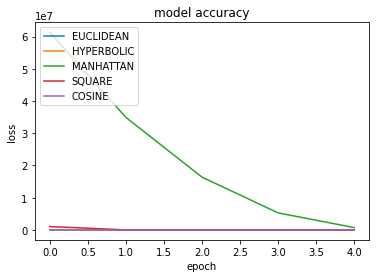

In [20]:
for key in DISTANCE_METRICS.keys():    
    plt.plot(objects[key]['history']['loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(list(DISTANCE_METRICS.keys()), loc='upper left')
plt.show()

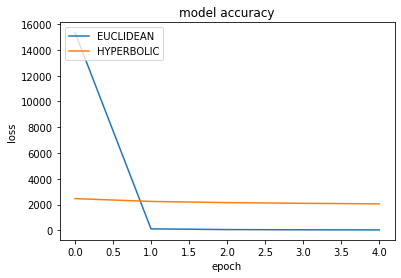

In [22]:
for key in ['EUCLIDEAN', 'HYPERBOLIC']: 
    if key != 'MANHATTAN' or key != 'SQUARE' or key != 'COSINE':
        plt.plot(objects[key]['history']['loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['EUCLIDEAN', 'HYPERBOLIC'], loc='upper left')
plt.show()

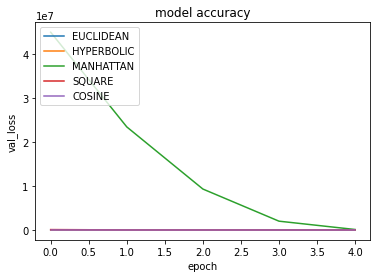

In [23]:
for key in DISTANCE_METRICS.keys():    
    plt.plot(objects[key]['history']['val_loss'])
plt.title('model accuracy')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(list(DISTANCE_METRICS.keys()), loc='upper left')
plt.show()

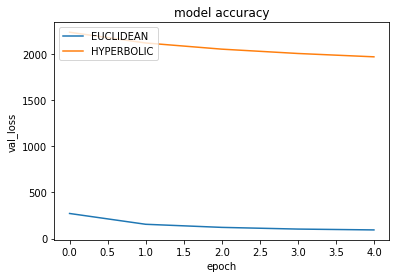

In [24]:
for key in ['EUCLIDEAN', 'HYPERBOLIC']: 
    if key != 'MANHATTAN' or key != 'SQUARE' or key != 'COSINE':
        plt.plot(objects[key]['history']['val_loss'])
plt.title('model accuracy')
plt.ylabel('val_loss')
plt.xlabel('epoch')
plt.legend(['EUCLIDEAN', 'HYPERBOLIC'], loc='upper left')
plt.show()

# HyperParam Tunning with RandomSearchCV

In [25]:
from model.layer import DistanceLayer
from model.models_cstm import SiameseModel
from model.generator import SequenceDistDataGenerator

def model_builder_hyp(hp):
    # Model definitions
    in1 = tf.keras.layers.Input(name="sequence1", shape=(152,))
    in2 = tf.keras.layers.Input(name="sequence2", shape=(152,))
    
    embedding_model = get_embedding_model()
    
    distance = DistanceLayer(metric=DISTANCE_METRICS['HYPERBOLIC'], dynamic=True)(
        embedding_model(in1), 
        embedding_model(in2)
    )

    siamese_network = tf.keras.models.Model(
        inputs=[in1, in2],
        outputs=distance
    )
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])
    optimizer  = tf.keras.optimizers.Adam(hp_learning_rate)
    
    model = SiameseModel(siamese_network) # Depends on SiameseModel class, which we can define elsewhere
    model.compile(optimizer=optimizer) # run_eagerly is not necessary, but useful for debugging
    
    return model

def model_builder_euc(hp):
    # Model definitions
    in1 = tf.keras.layers.Input(name="sequence1", shape=(152,))
    in2 = tf.keras.layers.Input(name="sequence2", shape=(152,))
    
    
    
    embedding_model = get_embedding_model()
    
    distance = DistanceLayer(metric=DISTANCE_METRICS['EUCLIDEAN'], dynamic=True)(
        embedding_model(in1), 
        embedding_model(in2)
    )

    siamese_network = tf.keras.models.Model(
        inputs=[in1, in2],
        outputs=distance
    )
    
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-5])
    optimizer  = tf.keras.optimizers.Adam(hp_learning_rate)
    
    model = SiameseModel(siamese_network) # Depends on SiameseModel class, which we can define elsewhere
    model.compile(optimizer=optimizer) # run_eagerly is not necessary, but useful for debugging
    
    return model

class MyTuner(keras_tuner.tuners.RandomSearch):
    def run_trial(self, trial, *args, **kwargs):
        # You can add additional HyperParameters for preprocessing and custom training loops
        # via overriding `run_trial`
        kwargs['batch_size'] = trial.hyperparameters.Int('batch_size', 256, 512, step=128)
        kwargs['epochs'] = trial.hyperparameters.Int('epochs', 5, 15, step = 2)

        X_val, y_val = kwargs['validation_data']
        training_generator = SequenceDistDataGenerator( X_train, y_train, batch_size = kwargs['batch_size'] )
        kwargs['validation_data'] = SequenceDistDataGenerator( X_val, y_val, batch_size = kwargs['batch_size'])
        
        return super(MyTuner, self).run_trial(trial, training_generator, **kwargs)

## RandomSearchCV Hyperparam Tuning (w/ Hyperbolic)

In [ ]:
# Uses same arguments as the BayesianOptimization Tuner.
tuner = MyTuner(model_builder_hyp, objective='val_loss' , directory='hyper_param_tunning/linear',
                     project_name='random_search_cv_hyp_dense', max_trials=10)

# Don't pass epochs or batch_size here, let the Tuner tune them.
tuner.search(X_train, y_train,  validation_data=(X_val,y_val),
             callbacks= [tf.keras.callbacks.EarlyStopping('val_loss', patience=2)])

In [ ]:
# Get the optimal hyperparameters
best_hps_HYPERBOLIC=tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps_HYPERBOLIC

All trail with the hyperbolic distance ended with a loss of nan, therefore no best parameters were selected for this variant of the model.

## RandomSearchCV Hyperparam Tuning (w/ EUCLIDEAN)

In [26]:
# Uses same arguments as the BayesianOptimization Tuner.
tuner = MyTuner(model_builder_euc, objective='val_loss', directory='hyper_param_tunning/linear',
                     project_name='random_search_cv_euc_dense',  max_trials=5)

# training_generator = SequenceDistDataGenerator( X_train, y_train )
# validation_generator = SequenceDistDataGenerator( X_val, y_val)

# Don't pass epochs or batch_size here, let the Tuner tune them.
# Run the code below if you want to start search again
# tuner.search(X_train, y_train,  validation_data=(X_val,y_val),
#              callbacks= [tf.keras.callbacks.EarlyStopping('val_loss', patience=2)])

INFO:tensorflow:Reloading Oracle from existing project hyper_param_tunning/linear/random_search_cv_euc_dense/oracle.json
INFO:tensorflow:Reloading Tuner from hyper_param_tunning/linear/random_search_cv_euc_dense/tuner0.json


In [27]:
# Get the optimal hyperparameters
best_hps_EUCLIDEAN=tuner.get_best_hyperparameters(num_trials=1)[0]
best_hps_EUCLIDEAN

In [28]:
print(f'Best hyperparamters:\nEpochs: {best_hps_EUCLIDEAN.get("epochs")}\nLearning Rate: {best_hps_EUCLIDEAN.get("learning_rate")}\nBatch Size: {best_hps_EUCLIDEAN.get("batch_size")}')

Best hyperparamters:
Epochs: 9
Learning Rate: 0.001
Batch Size: 384
